# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
#installing selenium package
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium




Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [802 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,104 kB]
Get:13 http://archive.ubuntu.com/ub

In [ ]:
from selenium import webdriver #importing selenium
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)
link = 'https://www.imdb.com/title/tt9603212/reviews/?ref_=tt_ql_2'
title_array = []
review_array = []
driver.get(link)

for num in range(4):
    driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
    time.sleep(5)
    listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
    listOfReviews = driver.find_elements(By.CLASS_NAME, "text")

for ele, sub_ele in zip(listOfTitle, listOfReviews):
    title_array.append((ele.text).replace('\n', ''))
    review_array.append(sub_ele.text)

df = pd.DataFrame(list(zip(title_array, review_array)), columns=['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
print(df)


Length of data frame is 125
                                                 Title  \
0    Mission: Impossible - Dead Reckoning (Part One...   
1                                   Very disappointing   
2                       A Mindless Scour to the Series   
3         Your high expectations will get a beating...   
4                                         Dead stupid.   
..                                                 ...   
120  Cruise and McQuarrie Continue to Revolutionize...   
121                                         GOOD MOVIE   
122                     Not as good as earlier outings   
123                      Not Bad, But I've Seen Better   
124                           The best in the series??   

                                                Review  
0    Man.... I wish I loved this movie more than I ...  
1    After the first 30 minutes that promised an in...  
2    Ethan Hunt has left the mere secret agent stat...  
3    4 considerations for those with high expec

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

In [ ]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))
from textblob import Word
import nltk
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('/content/sample_data/cleaned_reviwes.csv',index=False)



words_sentence = []
for sentence in df['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


FreqDist({('dead', 'reckon', 'part'): 17, ('reckon', 'part', 'one'): 16, ('imposs', 'dead', 'reckon'): 11, ('mission', 'imposs', 'dead'): 10, ('mission', 'imposs', 'movi'): 8, ('action', 'set', 'piec'): 5, ('top', 'gun', 'maverick'): 5, ('mission', 'imposs', 'move'): 5, ('latest', 'mission', 'imposs'): 5, ('great', 'action', 'scene'): 5, ...})

In [ ]:
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))


Streaming output truncated to the last 5000 lines.
('favourit', 'mi'):0.3333333333333333
('film', 'rogu'):0.007462686567164179
('nation', 'actual'):0.1
('actual', 'clever'):0.038461538461538464
('clever', 'plot'):0.14285714285714285
('plot', 'full'):0.021739130434782608
('full', 'intric'):0.1111111111111111
('intric', 'doubl'):0.5
('cross', 'time'):0.25
('time', 'prioritis'):0.015384615384615385
('prioritis', 'thrill'):1.0
('thrill', 'spectacl'):0.047619047619047616
('spectacl', 'suspens'):0.2
('suspens', 'action'):0.2222222222222222
('also', 'harley'):0.020833333333333332
('well', 'great'):0.043478260869565216
('great', 'still'):0.01639344262295082
('still', 'prefer'):0.023255813953488372
('prefer', 'rebecca'):0.5
('ferguson', 'lastli'):0.07692307692307693
('lastli', 'feel'):1.0
('movi', 'sometim'):0.004524886877828055
('sometim', 'get'):0.25
('get', 'weigh'):0.022222222222222223
('weigh', 'heighten'):1.0
('heighten', 'sen'):1.0
('sen', 'emot'):0.058823529411764705
('emot', 'stake'):0

In [ ]:
import nltk
nltk.download('brown')
from textblob import TextBlob

noun_phrases = []
frequency = []

for line in df['After Lemmatization']:
    blob = TextBlob(line)
    for nouns in blob.noun_phrases:
        noun_phrases.append(nouns)

for word in noun_phrases:
    noun_phrases_freq = []
    for line in df['After Lemmatization']:
        noun_phrases_freq.append(line.count(word))
    frequency.append(noun_phrases_freq)

noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = df.index
noun_phrases_df


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


,wrong solid action movi jaw-drop,seri mission imposs movi,small step backward franchis ballot mind-blow action sequenc stung work,'s relationship ilya provid closur julia show length,rattl impos villain,dead reckon part,film seemingli showcas action spectacl action spectacl sacrif charact,decad film,sidelin ignor wast harley,new charact chew screen time fantast,...,bloodi hell someth,real kind stay,realm film repercuss creat ai,audienc particularli teach-navvi,current advanc,world sum,worth time,worth money,max possibl,normal theatr donna work
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf

<ipython-input-12-b750f7f9eeca>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
<ipython-input-12-b750f7f9eeca>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
<ipython-input-12-b750f7f9eeca>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

,token,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,,0.040979,0.045694,0.038627,0.029111,0.0,0.0,0.064983,0.02132,0.0,...,0.0,0.060038,0.054775,0.044658,0.0,0.016817,0.071881,0.0,0.022758,0.030211
1,i.,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,"impossible"".",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,manchuria,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,power.,0.000000,0.045694,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,plot,0.000000,0.000000,0.038627,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.060038,0.054775,0.000000,0.0,0.000000,0.000000,0.0,0.022758,0.000000
4413,accomplished,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4414,"4,",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4415,geography,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

query_sentence = "I wish I loved this movie more than I did. Don't get me wrong, it's a solid action movie with jaw-dropping stunts (some of the best in the series), but as a Mission: Impossible movie, it felt like a small step backward for the franchise. "
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english')
X_set = {w for w in X_list if not w in sw}

def compute_vector(X_set, Y_set):
    rvector = X_set.union(Y_set)
    l1 = []; l2 = []
    for w in rvector:
        if w in X_set: l1.append(1)
        else: l1.append(0)
        if w in Y_set: l2.append(1)
        else: l2.append(0)
    return rvector, l1, l2

def compute_cosine(rvector, l1, l2):
    c = 0
    for i in range(len(rvector)):
        c += l1[i]*l2[i]
    cosine = c / float((sum(l1)*sum(l2))**0.5)
    return cosine

similarity_list = []
for sentence in df['Spelling Correction']:
    Y_list = word_tokenize(sentence)
    Y_set = {w for w in Y_list if not w in sw}
    rvector, l1, l2 = compute_vector(X_set, Y_set)
    try:
        similarity = compute_cosine(rvector, l1, l2)
    except ZeroDivisionError:
        similarity = 'None'
    similarity_list.append(similarity)

cosine_dataframe = pd.DataFrame(list(zip(df['Review'], similarity_list)), columns=['Reviews', 'Cosine Similarity'])
cosine_dataframe


,Reviews,Cosine Similarity
0,Man.... I wish I loved this movie more than I ...,0.415761
1,After the first 30 minutes that promised an in...,0.079243
2,Ethan Hunt has left the mere secret agent stat...,0.179374
3,4 considerations for those with high expectati...,0.159152
4,,None
...,...,...
120,Tom Cruise tells his friends several times to ...,0.106931
121,Except for the very first movie in this franch...,0.155752
122,,None
123,"In the interest of full disclosure, I'm often ...",0.132967


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome(options=options)  # Pass options directly here
link = 'https://www.imdb.com/title/tt9603212/reviews/?ref_=tt_ql_2'
title_array = []
review_array = []
driver.get(link)

for num in range(4):
    driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
    time.sleep(5)
    listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
    listOfReviews = driver.find_elements(By.CLASS_NAME, "text")

for ele, sub_ele in zip(listOfTitle, listOfReviews):
    title_array.append((ele.text).replace('\n', ''))
    review_array.append(sub_ele.text)

df = pd.DataFrame(list(zip(title_array, review_array)), columns=['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
print(df)


Length of data frame is 125
                                                 Title  \
0    Mission: Impossible - Dead Reckoning (Part One...   
1                                   Very disappointing   
2                       A Mindless Scour to the Series   
3         Your high expectations will get a beating...   
4                                         Dead stupid.   
..                                                 ...   
120  Cruise and McQuarrie Continue to Revolutionize...   
121                                         GOOD MOVIE   
122                     Not as good as earlier outings   
123                      Not Bad, But I've Seen Better   
124                           The best in the series??   

                                                Review  
0    Man.... I wish I loved this movie more than I ...  
1    After the first 30 minutes that promised an in...  
2    Ethan Hunt has left the mere secret agent stat...  
3    4 considerations for those with high expec

In [ ]:
list2 = []
for i in df.index:
    y = str(df["Review"][i]).split()
    list2.append(y)
    from gensim.models import Word2Vec
model2 = Word2Vec(list2)
print(model2)
from gensim.models import Word2Vec
model2 = Word2Vec(list2)
print(model2)
words2 = list(model2.wv.index_to_key)
words2

Word2Vec<vocab=612, vector_size=100, alpha=0.025>
Word2Vec<vocab=612, vector_size=100, alpha=0.025>


['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'I',
 'in',
 'this',
 'that',
 'was',
 'it',
 'as',
 'The',
 'movie',
 'with',
 'for',
 'are',
 'but',
 'action',
 'on',
 'not',
 'be',
 'have',
 'like',
 'they',
 'just',
 'you',
 'one',
 'from',
 'an',
 'Tom',
 'Cruise',
 'film',
 'has',
 'all',
 'so',
 'more',
 '-',
 'there',
 'at',
 'really',
 'than',
 "it's",
 'some',
 'by',
 'This',
 'much',
 'good',
 'out',
 'been',
 'very',
 'what',
 'which',
 'or',
 'great',
 'his',
 'were',
 "It's",
 'about',
 'still',
 'can',
 'even',
 'will',
 'It',
 'me',
 'Part',
 'scenes',
 'how',
 'franchise',
 'if',
 'its',
 'had',
 'make',
 'Impossible',
 'part',
 'MI',
 'time',
 'up',
 'when',
 'being',
 'he',
 'most',
 'only',
 'did',
 'plot',
 'see',
 'also',
 'their',
 'movie.',
 'And',
 'story',
 'no',
 'previous',
 'feel',
 'movies',
 'could',
 'felt',
 'my',
 'do',
 'would',
 'There',
 'better',
 'going',
 'well',
 'Ethan',
 'best',
 'over',
 'character',
 'scene',
 'any',
 'stunts',
 "don't",
 'whole

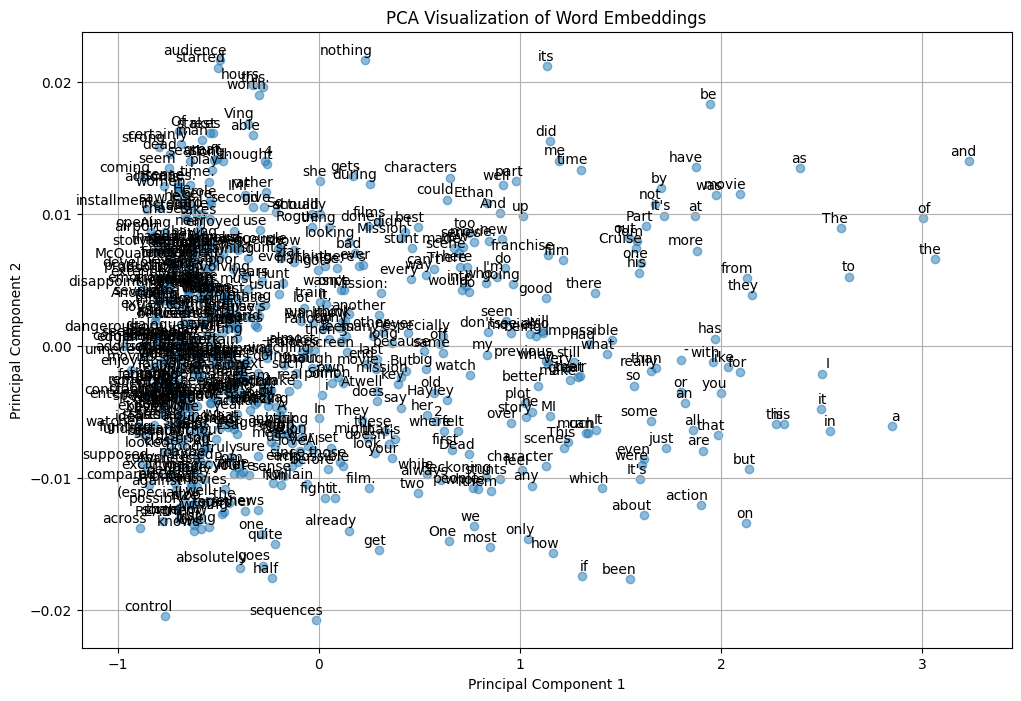

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_word_embeddings(model):
    # Get the vectors and corresponding words
    vectors = np.array([model.wv[word] for word in model.wv.index_to_key])
    words = model.wv.index_to_key

    # Fit a 2D PCA model
    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1], alpha=0.5)

    for word, (x, y) in zip(words, result):
        plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=10)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization of Word Embeddings')
    plt.grid(True)
    plt.show()

# Call the function to visualize word embeddings
visualize_word_embeddings(model2)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file

# Link: https://github.com/Yashwanthchowdary001/Yaswanth_Manne_INFO5731/blob/main/Sentiment.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer

'''Its very interesting assignment. the embedding model is bit thougher and new knew topic in coding which became difficult to write program.
 And the analysis part is quite interesting.
